In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('../../clean_data/FinalData_for_Models.csv', index_col=0)

In [3]:
df.index = pd.to_datetime(df.index)
df.index = df.index.tz_localize('UTC')
df.index = df.index.tz_convert('America/New_York')

In [4]:
df_count_hourly = df.groupby(df.index.hour).sum()

In [6]:
df.head()

,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday,precip_in,Avg_Delay_Arriving,Avg_Delay_Departing,Cancelled_Arriving_Flights,Cancelled_Departing_Flights
2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,True,0.0,0.0,0.0,0.0,0.0
2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,True,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,True,0.0,0.0,0.0,0.0,0.0
2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,True,0.0,291.0,0.0,0.0,0.0
2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,True,0.0,0.0,0.0,0.0,0.0


In [7]:
df_count_hourly['num_pickups'].sum()

10345319.610294119

In [8]:
df_mean_hourly = df.groupby(df.index.hour).mean()

In [9]:
df_mean_hourly.head()

,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,Passengers,Month,Hour,Day,holiday,precip_in,Avg_Delay_Arriving,Avg_Delay_Departing,Cancelled_Arriving_Flights,Cancelled_Departing_Flights
0,252.420860,431.010979,0.144088,283.410730,280.794980,285.791627,69.515531,2.946163,9.778387,6.094753,0.0,3.000000,0.026625,0.004863,54.636580,42.171789,0.000783,0.0
1,55.268493,96.459259,0.144531,282.984065,280.359102,285.423533,71.774935,2.770664,4.968750,6.106250,1.0,3.007031,0.026562,0.003891,38.287252,17.868803,0.001563,0.0
2,14.397612,26.003933,0.144540,282.651890,279.998218,285.140574,72.779222,2.779196,0.900236,6.104478,2.0,2.990573,0.026709,0.003818,20.043665,5.418015,0.000786,0.0
3,4.578225,8.419483,0.144088,282.316011,279.640469,284.847007,73.426977,2.700326,0.760376,6.094753,3.0,3.000000,0.026625,0.004824,8.319499,1.178543,0.000000,0.0
4,7.713632,12.611570,0.144088,281.980515,279.304987,284.523471,74.852545,2.657557,0.404855,6.094753,4.0,3.000000,0.026625,0.005897,5.751762,0.912294,0.000000,0.0


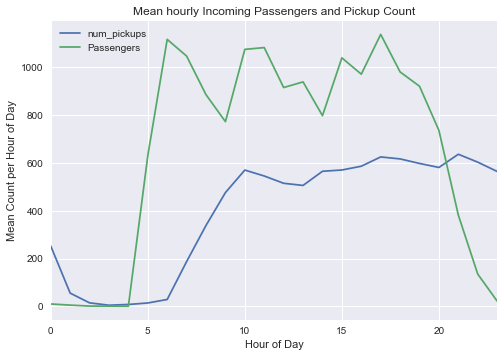

In [11]:
_ = df_mean_hourly.num_pickups.plot()
_ = df_mean_hourly.Passengers.plot()
plt.xlabel('Hour of Day')
plt.ylabel('Mean Count per Hour of Day')
plt.legend(loc='upper left')
plt.title('Mean hourly Incoming Passengers and Pickup Count')
plt.show()

In [12]:
df_daily = df.resample('D').sum()
df_daily.tail()

,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,Passengers,Month,Hour,Day,holiday,precip_in,Avg_Delay_Arriving,Avg_Delay_Departing,Cancelled_Arriving_Flights,Cancelled_Departing_Flights
2017-06-26 00:00:00-04:00,10466.0,17112.0,0.0,7063.170,6988.6,7124.6,995.0,69.0,18308.0,144,276,0,0.0,0.00,76.605249,152.474821,0.0,0.0
2017-06-27 00:00:00-04:00,8510.0,14054.0,0.0,7033.080,6961.6,7095.6,1340.0,50.0,17499.0,144,276,24,0.0,0.22,334.216701,528.674559,0.0,2.0
2017-06-28 00:00:00-04:00,9464.0,15531.0,0.0,7036.210,6967.6,7096.6,1193.0,66.0,18918.0,144,276,48,0.0,0.00,270.175879,598.725105,2.0,1.0
2017-06-29 00:00:00-04:00,8598.0,14391.0,0.0,7105.450,7032.6,7169.6,1323.0,104.0,17932.0,144,276,72,0.0,0.00,165.972791,253.354651,0.0,0.0
2017-06-30 00:00:00-04:00,7039.0,11967.0,0.0,7179.045,7110.6,7230.6,1403.0,104.0,18759.0,144,276,96,0.0,0.00,434.344210,1221.045740,8.0,10.0


In [13]:
df_mean_daily = df_daily.groupby(df_daily.index.dayofweek).mean()

In [14]:
df_mean_daily.head()

,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,Passengers,Month,Hour,Day,holiday,precip_in,Avg_Delay_Arriving,Avg_Delay_Departing,Cancelled_Arriving_Flights,Cancelled_Departing_Flights
0,11462.763622,19503.266827,3.428571,6834.002731,6776.034065,6887.437802,1539.679278,78.779736,16739.456044,146.241758,276.0,0.0,2.769231,0.113956,458.957368,539.431230,14.923077,15.126374
1,9995.866987,17034.458333,3.428571,6842.753177,6785.520680,6895.036568,1611.309341,76.670879,16542.884615,147.032967,276.0,24.0,0.131868,0.157693,436.055125,489.036884,14.115385,13.978022
2,9870.904459,16828.522293,3.409836,6845.726751,6789.787383,6896.108876,1594.571311,75.313232,16861.721311,147.147541,276.0,48.0,0.262295,0.131476,417.069223,458.256303,10.234973,10.885246
3,10202.579618,17604.707006,3.409836,6835.763770,6779.840767,6885.661501,1576.637796,79.704281,16648.420765,146.360656,276.0,72.0,0.655738,0.103934,469.809956,557.532985,13.448087,13.398907
4,9731.320513,16989.653846,3.540984,6827.623984,6773.620645,6875.482002,1560.093169,79.019035,16799.409836,145.442623,276.0,96.0,0.655738,0.112186,470.978230,560.278009,10.344262,10.639344


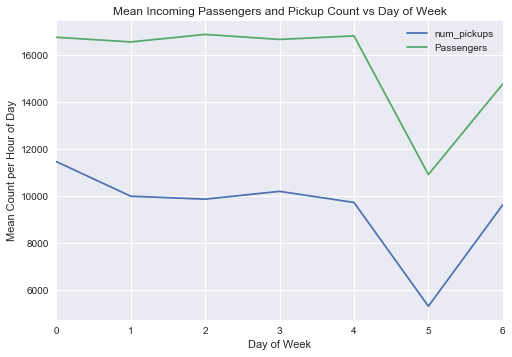

In [16]:
_ = df_mean_daily.num_pickups.plot()
_ = df_mean_daily.Passengers.plot()
plt.xlabel('Day of Week')
plt.ylabel('Mean Count per Hour of Day')
plt.legend(loc='upper right')
plt.title('Mean Incoming Passengers and Pickup Count vs Day of Week')
plt.show()

### Making bar chart comparing pickup count to incoming passengers per day of week

In [17]:
df_bar_plot = df_mean_daily.copy()

In [18]:
df_bar_plot.rename(index = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)

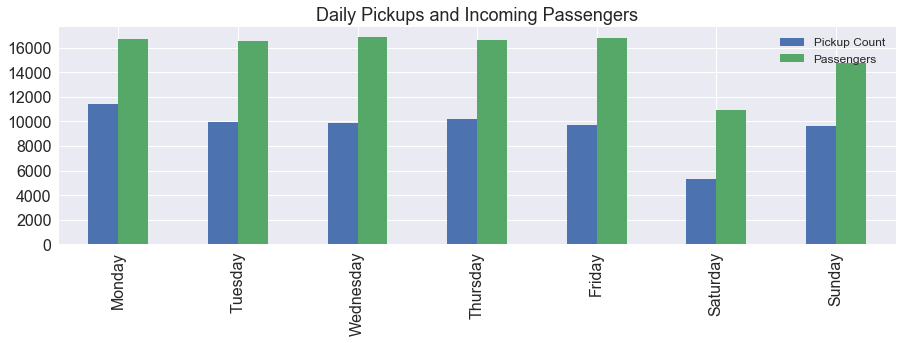

In [19]:
df_bar_plot = df_bar_plot[['num_pickups', 'Passengers']]
ax = df_bar_plot.plot(kind='bar', figsize=(15,4), fontsize='16')
ax.legend(['Pickup Count', 'Passengers'], fontsize='12')
plt.title('Daily Pickups and Incoming Passengers', fontsize='18')

### Re-Making the Hourly Plot Faceted by Weekday/Weekend

In [20]:
df2 = df.groupby([df.index.dayofweek, df.index.hour])['num_pickups', 'Passengers'].mean()

In [21]:
df3 = pd.DataFrame(df2)

In [22]:
df3.reset_index(inplace=True)

In [23]:
df4 = df3.groupby([df3.level_0 < 6, df3.level_1])['num_pickups', 'Passengers'].mean()

In [24]:
df4.index.set_levels([['Weekend', 'Weekday'], range(24)], inplace=True)

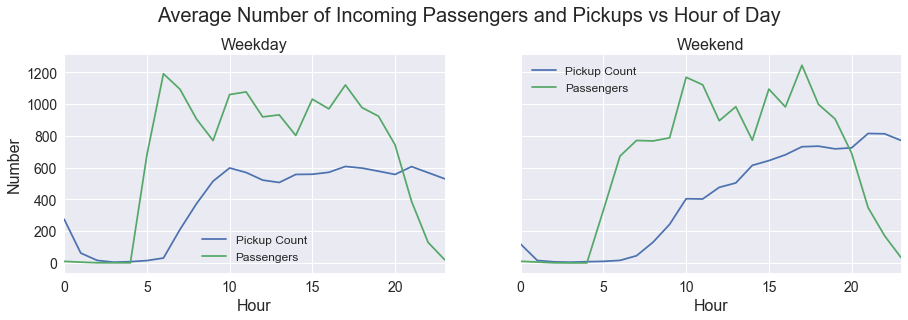

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True)

df4.loc['Weekday'].plot(ax=axes[0], fontsize='14')
axes[0].set_title('Weekday', fontsize='16')
axes[0].set_xlabel('Hour', fontsize='16')
axes[0].set_ylabel('Number', fontsize='16')
axes[0].legend(['Pickup Count', 'Passengers'], fontsize='12')

df4.loc['Weekend'].plot(ax=axes[1], fontsize='14')
axes[1].set_title('Weekend', fontsize='16')
axes[1].set_xlabel('Hour', fontsize='16')
axes[1].legend(['Pickup Count', 'Passengers'], fontsize='12')
fig.suptitle('Average Number of Incoming Passengers and Pickups vs Hour of Day', y=1.05, fontsize='20')